# Importing Libraries

In [108]:
from io import BytesIO
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read and Understand data

In [3]:
#Extracting data from zip file.

data=ZipFile('names.zip').extractall('.')

In [260]:
#Since out data ranges from year 1880 to 2021 and each year data is stored in separate file,
#hence collecting data through for loop.

years=[]
for year in range(1880, 2022):
    years.append(pd.read_csv(f'yob{year}.txt', names=['Name','Sex','Babies']))
    years[-1]['Year']=year

In [261]:
#Concatenating data

df=pd.concat(years).reset_index(drop=True)

In [262]:
#Top 5 rows of data

df.head()

,Name,Sex,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [263]:
#Bottom 5 rows of data

df.tail()

,Name,Sex,Babies,Year
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021
2052780,Zyn,M,5,2021


From data we can observe that the dataset only includes names which have at least 5 records

In [264]:
#Checking for any duplicat values

df.duplicated().value_counts()

False    2052781
dtype: int64

In [265]:
#Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052781 entries, 0 to 2052780
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Sex     object
 2   Babies  int64 
 3   Year    int64 
dtypes: int64(2), object(2)
memory usage: 62.6+ MB


In [266]:
#Shape of data

df.shape

(2052781, 4)

In [267]:
#Identifying count of unique names

df['Name'].nunique()

101338

In [268]:
#Identifying count of unique names of males

df[df['Sex']=='M']['Name'].nunique()

43093

In [269]:
#Identifying count of unique names of females

df[df['Sex']=='F']['Name'].nunique()

69527

In [270]:
#Identifying count of gender neutral names

both_df = df.pivot_table(index="Name", columns="Sex", values="Babies", aggfunc=np.sum).dropna()
both_df.index.nunique()

11282

In [271]:
#Separating male and female data

male=df[df['Sex']=='M'].reset_index(drop=True)
female=df[df['Sex']=='F'].reset_index(drop=True)

In [272]:
#Identifying top 10 most used male and female names

top_10_male=male.groupby('Name')['Babies'].sum().sort_values(ascending=False)
pd.DataFrame(top_10_male.head(10))

,Babies
Name,
James,5202714
John,5150510
Robert,4834094
Michael,4392696
William,4156142
David,3646903
Joseph,2639396
Richard,2571082
Charles,2411608


In [273]:
top_10_female=female.groupby('Name')['Babies'].sum().sort_values(ascending=False)
pd.DataFrame(top_10_female.head(10))

,Babies
Name,
Mary,4132497
Elizabeth,1661030
Patricia,1572795
Jennifer,1469379
Linda,1453755
Barbara,1435386
Margaret,1255686
Susan,1122518
Dorothy,1109423


In [274]:
#Top 10 gender neutral names

df_p=df.pivot_table(index="Name", columns="Sex", values="Babies", aggfunc=np.sum).dropna()

In [275]:
#Adding total of both male and female babies count 

df_p['Total']=df_p['F']+df_p['M']
df_p

Sex,F,M,Total
Name,,,
Aaden,5.0,5013.0,5018.0
Aadi,16.0,988.0,1004.0
Aadyn,16.0,572.0,588.0
Aalijah,149.0,257.0,406.0
Aaliyah,98342.0,101.0,98443.0
...,...,...,...
Zyn,13.0,15.0,28.0
Zyon,676.0,3268.0,3944.0
Zyonn,5.0,70.0,75.0


In [276]:
#Top 10 gender neutral names and its count

df_p.sort_values(by='Total',ascending=False).head(10)

Sex,F,M,Total
Name,,,
James,23595.0,5202714.0,5226309.0
John,21723.0,5150510.0,5172233.0
Robert,20105.0,4834094.0,4854199.0
Michael,21811.0,4392696.0,4414507.0
William,16003.0,4156142.0,4172145.0
Mary,4132497.0,15172.0,4147669.0
David,12936.0,3646903.0,3659839.0
Joseph,10687.0,2639396.0,2650083.0
Richard,9528.0,2571082.0,2580610.0


In [277]:
#Finding out no of Male : female ratio year wise

df_new=df.pivot_table(index='Year',columns='Sex',values='Babies',aggfunc='sum')
df_new.head(10)

Sex,F,M
Year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442
1885,133055,107799
1886,144533,110784
1887,145982,101411
1888,178622,120851


In [278]:
df_new['Ratio']=df_new['M']/df_new['F']
df_new.head()

Sex,F,M,Ratio
Year,,,
1880,90994,110490,1.214256
1881,91953,100737,1.095527
1882,107847,113686,1.054142
1883,112319,104625,0.931499
1884,129019,114442,0.887017


In [279]:
#Finding out ratio where no of male is greater than no of female babies

df_new[df_new['Ratio']>=1]

Sex,F,M,Ratio
Year,,,
1880,90994,110490,1.214256
1881,91953,100737,1.095527
1882,107847,113686,1.054142
1937,1063995,1066586,1.002435
1938,1103434,1109113,1.005147
1939,1096615,1106797,1.009285
1940,1143466,1159091,1.013665
1941,1208087,1228199,1.016648
1942,1350678,1381031,1.022472


Total 87 number of year has more no of male babies than female babies

In [280]:
##Finding out ratio where no of male is less than no of female babies

df_new[df_new['Ratio']<1]

Sex,F,M,Ratio
Year,,,
1883,112319,104625,0.931499
1884,129019,114442,0.887017
1885,133055,107799,0.810184
1886,144533,110784,0.766496
1887,145982,101411,0.694682
1888,178622,120851,0.676574
1889,178366,110580,0.619961
1890,190377,111024,0.583180
1891,185480,101191,0.545563


In [281]:
df_new[df_new['Ratio']<1].shape

(54, 3)

Total 54 number of year has more no of female babies than male babies

In [282]:
#Finding out which year has highest and lowest birth count gender wise

#Highest male birth count and year

df_male=male.groupby('Year').sum()
df_male.sort_values(by='Babies',ascending=False).head(1)  

#Or we can use "df_male.max()['Babies']" for max babies count
# "df_male.idxmax()['Babies']" for year which has max babies count

,Babies
Year,
1957,2156314


Highest male babies birth count in particular year is 21,56,314 in year 1957

In [283]:
#Lowest male birth count and year

df_male.sort_values(by='Babies').head(1)

,Babies
Year,
1881,100737


Lowest male babies birth count in particular year is 1,00,737 in year 1881

In [284]:
#Highest female birth count and year

df_female=female.groupby('Year').sum()
df_female.sort_values(by='Babies',ascending=False).head(1)

,Babies
Year,
1957,2044615


Highest female babies birth count in particular year is 20,44,615 in year 1957

In [285]:
#Lowest male birth count and year

df_female.sort_values(by='Babies').head()

,Babies
Year,
1880,90994
1881,91953
1882,107847
1883,112319
1884,129019


Lowest male babies birth count in particular year is 90,994 in year 1880

In [286]:
#Highest birth count and year

df_both=df.groupby('Year').sum()
print('Highest babies birth count:',df_both.max()['Babies'])
print('Highest babies birth year:',df_both.idxmax()['Babies'])

Highest babies birth count: 4200929
Highest babies birth year: 1957


Year 1957 has highest no of babies born which is 42,00,929

In [287]:
print('Lowest babies birth count:',df_both.min()['Babies'])
print('Lowest babies birth year:',df_both.idxmin()['Babies'])

Lowest babies birth count: 192690
Lowest babies birth year: 1881


Year 1881 has lowest no of babies born which is 1,92,690

# Data Visualization

Plotting data

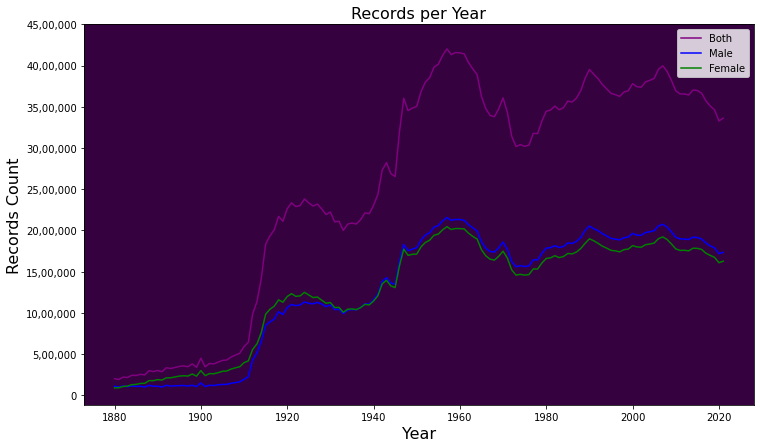

In [288]:
plt.figure(figsize=[12,7])
plt.plot(df_both, label="Both", color="purple")
plt.plot(df_male, label="Male", color="blue")
plt.plot(df_female, label="Female", color="green")
plt.legend()
yticks_labels = [0,'5,00,000','10,00,000','15,00,000','20,00,000','25,00,000','30,00,000','35,00,000','40,00,000','45,00,000']
plt.yticks(np.arange(0, 4500000+1, 500000), yticks_labels)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Records Count",fontsize=16)
plt.title("Records per Year",fontsize=16)
plt.gca().set_facecolor('#36013F')
plt.show()

<Figure size 720x2160 with 0 Axes>

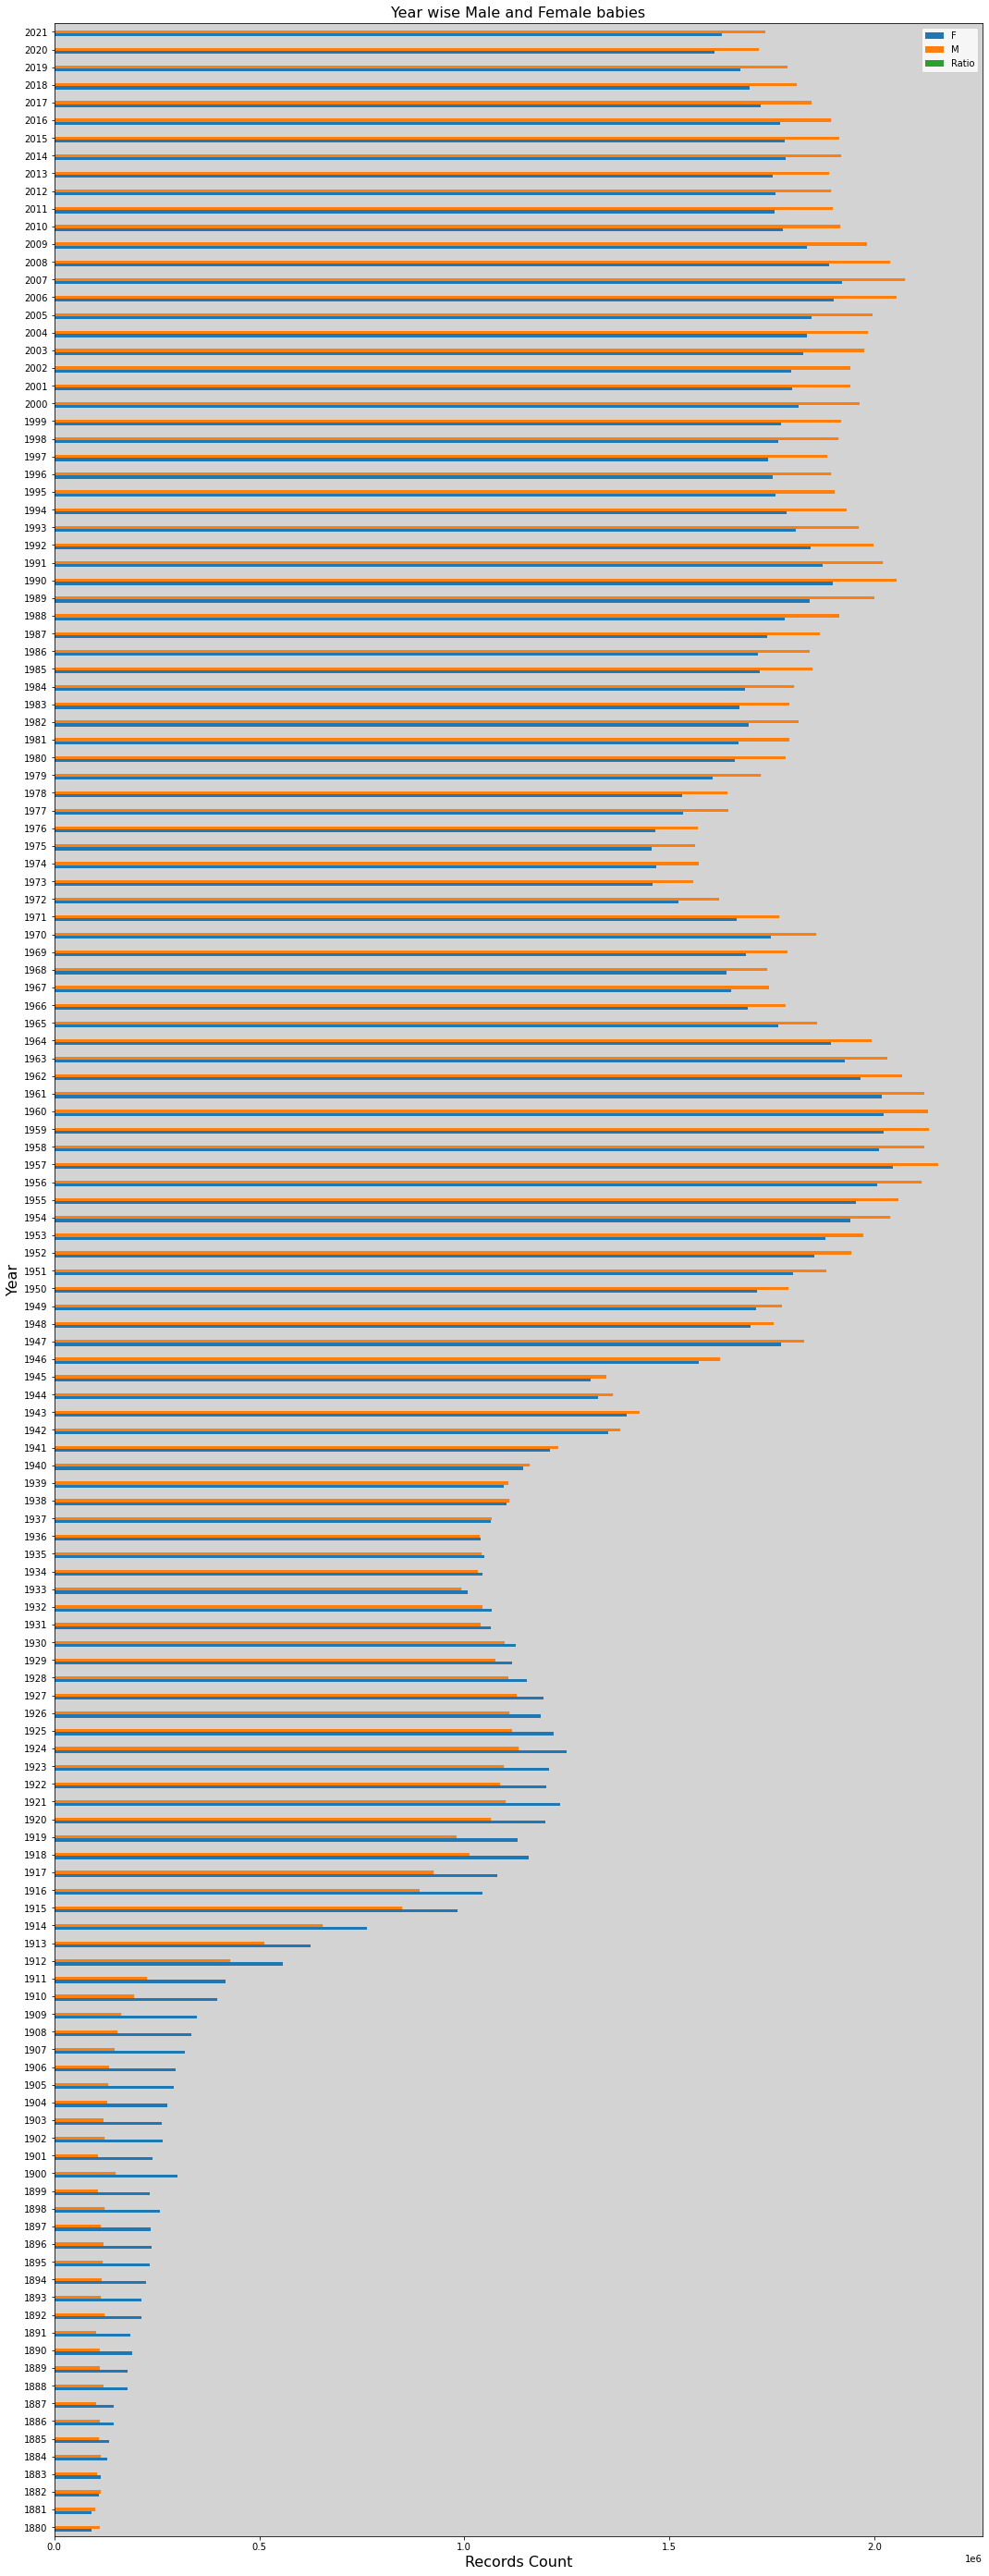

In [289]:
#Plotting bar plot for male and female babies count year wise

plt.figure(figsize=[10,30])
df_new.plot(kind='barh',figsize=(18,50))
plt.title('Year wise Male and Female babies',fontsize=16)
plt.ylabel("Year",fontsize=16)
plt.xlabel("Records Count",fontsize=16)
plt.gca().set_facecolor("lightgrey")
plt.legend()
plt.show()

In [290]:
#Sorting top baby names by count of birth 

sort_baby_names=df.sort_values(by='Babies',ascending=False).reset_index(drop=True)
pd.options.display.max_rows=100
sort_baby_names.head(100)

,Name,Sex,Babies,Year
0,Linda,F,99693,1947
1,Linda,F,96212,1948
2,James,M,94762,1947
3,Michael,M,92723,1957
4,Robert,M,91651,1947
5,Linda,F,91019,1949
6,Michael,M,90715,1956
7,Michael,M,90574,1958
8,James,M,88595,1948
9,Michael,M,88570,1954


In [307]:
#Count of babies and thier names used from year 1880 to 2021

top_100_names=sort_baby_names.head(100)
grouped_names = top_100_names[['Name','Babies']].groupby('Name').sum().sort_values(by='Babies', ascending=False)
grouped_names

,Babies
Name,
James,1808548
Michael,1768250
John,1525027
Robert,1467437
David,978084
Linda,441332
Mary,219697


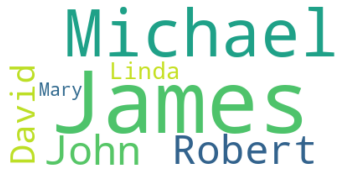

In [313]:
#Importing Library 

from wordcloud import WordCloud

#Creating the text variable

text1 = " ".join(title for title in top_100_names.Name)

# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(text1)

# Display the generated Word Cloud

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [293]:
#Trend of most popular names till now

pivoted_df = df.pivot_table(index="Name", columns="Year", values="Babies", aggfunc=np.sum).fillna(0)
percentage_df = (pivoted_df / pivoted_df.sum())* 100
percentage_df["total"] = percentage_df.sum(axis=1)
sorted_df = percentage_df.sort_values(by="total", ascending=False).drop("total", axis=1)[0:10]
transposed_df = sorted_df.T

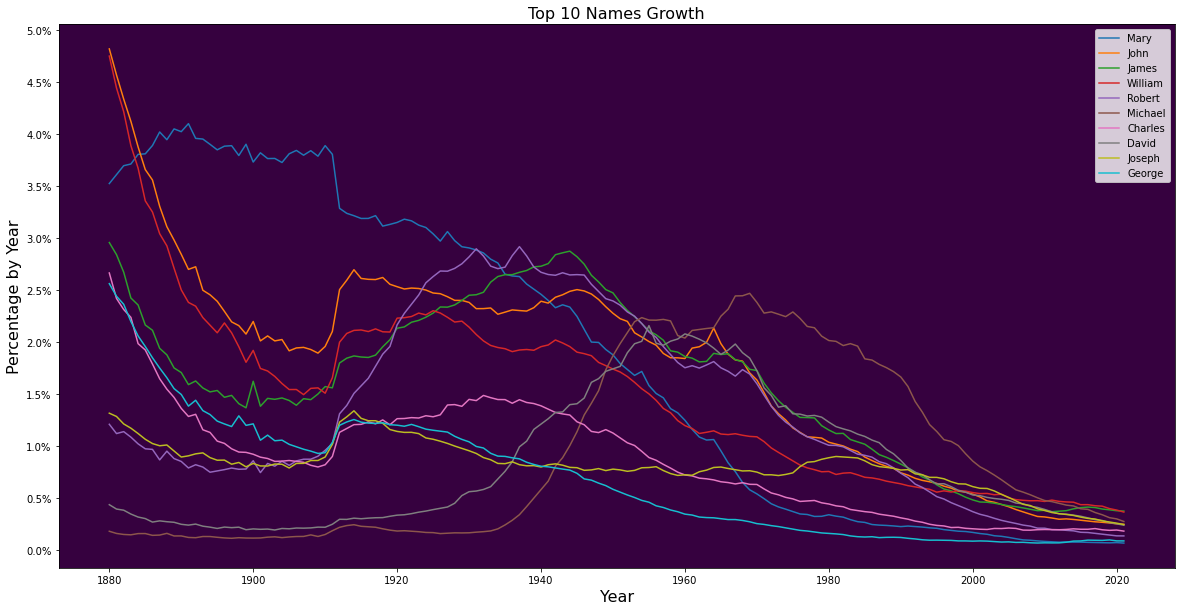

In [294]:
plt.figure(figsize=[20,10])
yticks_labels = ["{}%".format(i) for i in np.arange(0, 5.5, 0.5)]
plt.yticks(np.arange(0, 5.5, 0.5), yticks_labels)
for Name in transposed_df.columns.tolist():
    plt.plot(transposed_df.index, transposed_df[Name], label=Name)
plt.legend()
plt.xlabel("Year",fontsize=16)
plt.ylabel("Percentage by Year",fontsize=16)
plt.title("Top 10 Names Growth",fontsize=16)
plt.gca().set_facecolor('#36013F')
plt.show()


In [295]:
# Top 10 trending names in past 10 years 

filtered_df= df[df['Year']>=2010]
pivoted_df1 = filtered_df.pivot_table(index="Name", columns="Year", values="Babies", aggfunc=np.sum).fillna(0)
percentage_df1 = (pivoted_df1 / pivoted_df1.sum())* 100
percentage_df1["total"] = percentage_df1.sum(axis=1)
sorted_df1 = percentage_df1.sort_values(by="total", ascending=False).drop("total", axis=1)[0:10]
transposed_df1 = sorted_df1.T

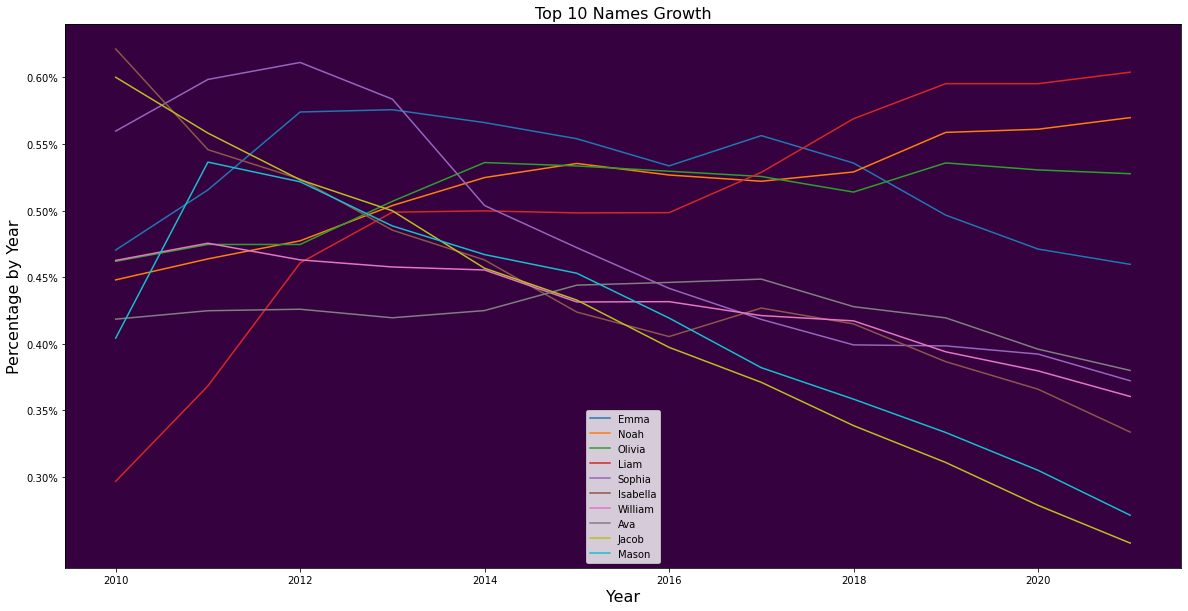

In [296]:
plt.figure(figsize=[20,10])
yticks_labels = ["{:.2f}%".format(i) for i in np.arange(0.3, 0.7, 0.05)]
plt.yticks(np.arange(0.3, 0.7, 0.05), yticks_labels)
for Name in transposed_df1.columns.tolist():
    plt.plot(transposed_df1.index, transposed_df1[Name], label=Name)
plt.legend()
plt.xlabel("Year",fontsize=16)
plt.ylabel("Percentage by Year",fontsize=16)
plt.title("Top 10 Names Growth",fontsize=16)
plt.gca().set_facecolor('#36013F')
plt.show()
